C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14012\719900725.py:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


Image Exists: True
GT Exists: True


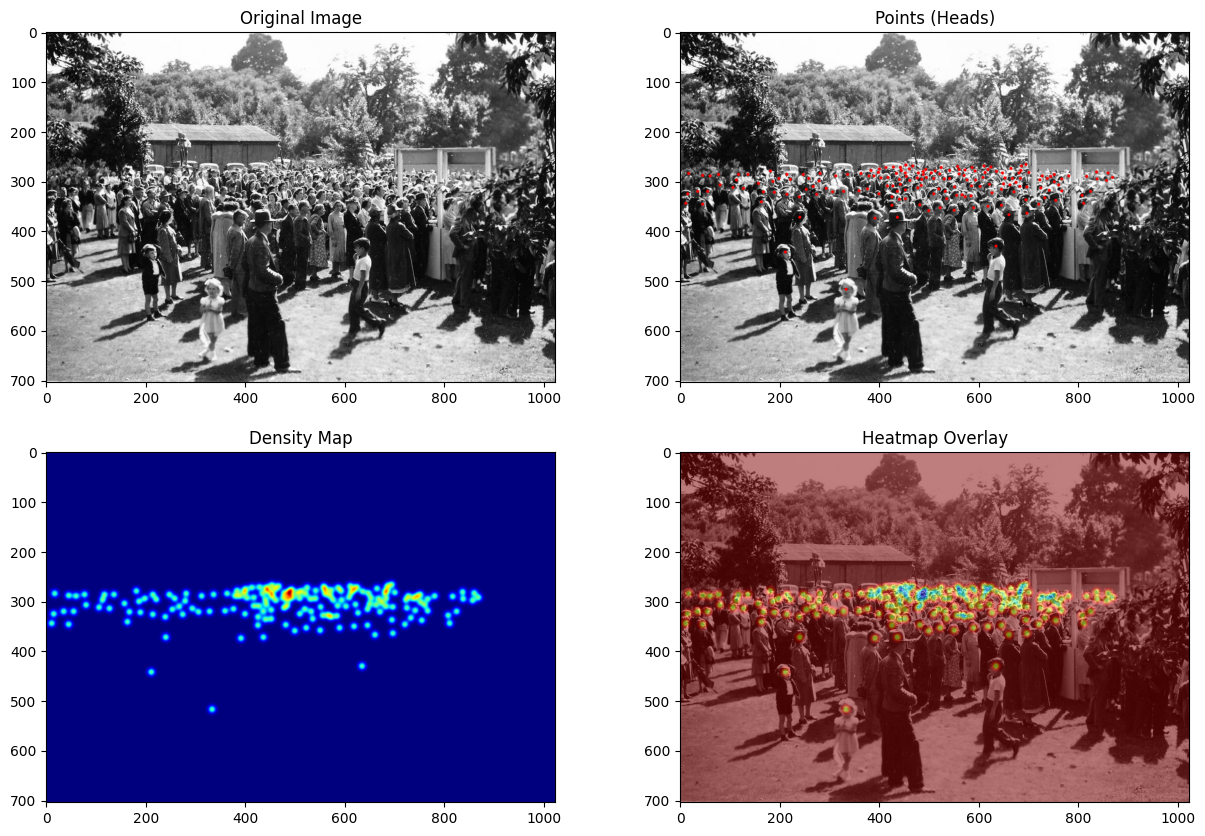

People Count: 172


In [3]:
import cv2
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter

# ---- FIXED PATH ----
img_path = r"C:\Users\Lenovo\Downloads\deep dataset\part_A_final\test_data\images\IMG_1.jpg"
gt_path  = r"C:\Users\Lenovo\Downloads\deep dataset\part_A_final\test_data\ground_truth\GT_IMG_1.mat"

# ---- CHECK PATHS ----
import os
print("Image Exists:", os.path.exists(img_path))
print("GT Exists:", os.path.exists(gt_path))

# ---- LOAD IMAGE ----
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Image not loaded. Check image path!")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---- LOAD POINTS ----
gt = scipy.io.loadmat(gt_path)
points_raw = gt["image_info"][0][0][0][0][0]
points = [(int(x), int(y)) for (x,y) in points_raw]

# ---- CREATE DENSITY MAP ----
h, w = img.shape[:2]
density_map = np.zeros((h, w), dtype=np.float32)

for x, y in points:
    if 0 <= x < w and 0 <= y < h:
        density_map[y, x] = 1.0

density_map = gaussian_filter(density_map, sigma=5)

# ---- DRAW POINTS ----
img_points = img.copy()
for x, y in points:
    cv2.circle(img_points, (x, y), 3, (255, 0, 0), -1)

# ---- HEATMAP ----
density_norm = density_map / density_map.max()
heatmap = cv2.applyColorMap((density_norm*255).astype(np.uint8), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)

# ---- SHOW RESULTS ----
plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.imshow(img); plt.title("Original Image")
plt.subplot(2,2,2); plt.imshow(img_points); plt.title("Points (Heads)")
plt.subplot(2,2,3); plt.imshow(density_map, cmap="jet"); plt.title("Density Map")
plt.subplot(2,2,4); plt.imshow(overlay); plt.title("Heatmap Overlay")
plt.show()

print("People Count:", len(points))

In [ ]:
python -m pip install --upgrade pip
pip install jupyterlab matplotlib opencv-python numpy scipy
# then start Jupyter Lab or Notebook:
jupyter lab    # or jupyter notebookpython -m pip install --upgrade pip
pip install jupyterlab matplotlib opencv-python numpy scipy
# then start Jupyter Lab or Notebook:
jupyter lab    # or jupyter notebook